In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [2]:
data = pd.read_csv('./relevant_data/wrangled_data.csv')

In [3]:
data.head()

,state,county,density_km,days_counted,case_count_28_days,death_count_28_days,confirmed_infection(%_of_pop),death_perc(%_of_case),avg_daily_case_increase(%_of_pop),case_count_28_days(%_of_pop),...,percent_65_and_over,percent_black,percent_american_indian_alaska_native,percent_asian,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white,percent_not_proficient_in_english,percent_female,percent_rural
0,Alabama,Autauga,35.436,40,28,1,0.087959,6.250000,0.002199,0.051309,...,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162
1,Alabama,Baldwin,44.261,50,59,1,0.102598,2.139037,0.002052,0.032370,...,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099
2,Alabama,Barbour,11.979,30,39,1,0.163893,2.222222,0.005463,0.142040,...,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635
3,Alabama,Bibb,14.215,34,38,0,0.187650,0.000000,0.005519,0.165830,...,16.473214,21.120536,0.437500,0.236607,0.116071,2.625000,74.589286,0.268210,46.781250,68.352607
4,Alabama,Blount,34.325,39,26,0,0.069781,0.000000,0.001789,0.045358,...,18.236515,1.462656,0.653527,0.319848,0.121024,9.571231,86.886238,1.724520,50.726141,89.951502


In [4]:
data.columns

Index(['state', 'county', 'density_km', 'days_counted', 'case_count_28_days',
       'death_count_28_days', 'confirmed_infection(%_of_pop)',
       'death_perc(%_of_case)', 'avg_daily_case_increase(%_of_pop)',
       'case_count_28_days(%_of_pop)', 'death_count_28_days(%_of_case)',
       'years_of_potential_life_lost_rate', 'percent_fair_or_poor_health',
       'percent_low_birthweight', 'percent_smokers',
       'percent_adults_with_obesity', 'food_environment_index',
       'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'chlamydia_rate',
       'teen_birth_rate', 'percent_uninsured', 'primary_care_physicians_rate',
       'dentist_rate', 'preventable_hospitalization_rate',
       'percent_with_annual_mammogram', 'percent_vaccinated',
       'high_school_graduation_rate', 'percent_some_college', 'labor_force',
       'percent_unemployed', 'percent_chi

In [5]:
excluded_columns = [
    'state', 
    'county',  
    'days_counted', 
    'case_count_28_days',
    'death_count_28_days', 
    'confirmed_infection(%_of_pop)',
    'death_perc(%_of_case)', 
    'avg_daily_case_increase(%_of_pop)',
    'case_count_28_days(%_of_pop)', 
    'death_count_28_days(%_of_case)',
    'presence_of_water_violation'
]

In [6]:
data_subset = data[excluded_columns]

In [7]:
main_data = data.drop(excluded_columns, axis=1)

In [8]:
main_data.columns

Index(['density_km', 'years_of_potential_life_lost_rate',
       'percent_fair_or_poor_health', 'percent_low_birthweight',
       'percent_smokers', 'percent_adults_with_obesity',
       'food_environment_index', 'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'chlamydia_rate',
       'teen_birth_rate', 'percent_uninsured', 'primary_care_physicians_rate',
       'dentist_rate', 'preventable_hospitalization_rate',
       'percent_with_annual_mammogram', 'percent_vaccinated',
       'high_school_graduation_rate', 'percent_some_college', 'labor_force',
       'percent_unemployed', 'percent_children_in_poverty',
       '80th_percentile_income', '20th_percentile_income',
       'percent_single_parent_households', 'social_association_rate',
       'injury_death_rate', 'average_daily_pm2_5',
       'percent_severe_housing_problems', 'severe_housing_cost_burden'

In [9]:
chi_square_value, p_value = calculate_bartlett_sphericity(main_data)

In [10]:
chi_square_value, p_value

(191669.15394099857, 0.0)

In [11]:
kmo_all, kmo_model = calculate_kmo(main_data)

In [12]:
kmo_model

0.8655191944966859

In [13]:
main_data.shape

(2200, 62)

In [14]:
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation='varimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=25, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [15]:
ev, v = fa.get_eigenvalues()

In [16]:
ev[:25]

array([18.15699606,  8.16612553,  4.86127451,  3.38099128,  2.43097913,
        1.98087066,  1.7238022 ,  1.58640095,  1.25649555,  1.1997496 ,
        1.14276349,  1.04539845,  0.98120129,  0.89096213,  0.85388012,
        0.82963874,  0.69980463,  0.64113469,  0.62368411,  0.6024376 ,
        0.58013714,  0.56940638,  0.5314898 ,  0.47279928,  0.46028204])

In [17]:
ev[25:]

array([4.44959654e-01, 4.28475233e-01, 3.87655975e-01, 3.76657488e-01,
       3.48673520e-01, 3.32528296e-01, 3.14833513e-01, 3.04855819e-01,
       2.92844382e-01, 2.81119259e-01, 2.73063165e-01, 2.37395544e-01,
       2.34185280e-01, 2.13979881e-01, 2.01908169e-01, 1.87873888e-01,
       1.79099483e-01, 1.62721258e-01, 1.50814294e-01, 1.42917742e-01,
       1.31162266e-01, 1.11700455e-01, 9.88710507e-02, 9.30929311e-02,
       8.12591691e-02, 7.40483196e-02, 5.53809963e-02, 4.91843661e-02,
       3.91780455e-02, 3.57871421e-02, 2.35608176e-02, 1.96073488e-02,
       1.61094578e-02, 4.17066673e-03, 7.61898412e-04, 4.66502923e-04,
       3.91380871e-04])

In [18]:
fa.loadings_.shape

(62, 25)

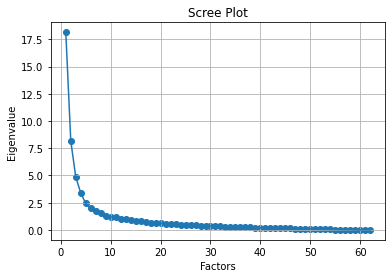

In [19]:
# Create scree plot using matplotlib
plt.scatter(range(1, main_data.shape[1]+1), ev)
plt.plot(range(1, main_data.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [32]:
fa = FactorAnalyzer()
fa.set_params(n_factors=10, rotation='varimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=10, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [33]:
fa.get_factor_variance()

(array([15.84779099,  3.73431942,  3.61438784,  3.59760265,  3.26721206,
         3.04557466,  2.80801333,  2.32080622,  2.24099254,  1.20539882]),
 array([0.25560953, 0.06023096, 0.05829658, 0.05802585, 0.05269697,
        0.04912217, 0.04529054, 0.03743236, 0.03614504, 0.01944192]),
 array([0.25560953, 0.31584049, 0.37413707, 0.43216292, 0.48485989,
        0.53398206, 0.5792726 , 0.61670495, 0.65285   , 0.67229191]))

In [34]:
factor_df = pd.DataFrame(fa.loadings_)

In [35]:
factor_df.index = main_data.columns

In [36]:
factor_df.shape

(62, 10)

In [37]:
pd.set_option('display.max_rows', None)
factor_df

,0,1,2,3,4,5,6,7,8,9
density_km,-0.103991,0.042143,0.116013,0.048458,0.733715,-0.017091,0.035350,-0.050595,0.017861,-0.017936
years_of_potential_life_lost_rate,0.879977,-0.129752,-0.054381,0.109220,-0.071167,0.091580,-0.033097,0.224858,-0.036235,0.213973
percent_fair_or_poor_health,0.867087,0.240766,0.116231,0.203033,-0.053167,0.138317,-0.054200,-0.010075,0.100442,-0.022780
percent_low_birthweight,0.602664,-0.075997,0.123989,0.515648,0.041285,0.057255,-0.070211,-0.094465,-0.021510,0.172576
percent_smokers,0.843203,-0.213618,-0.018416,-0.013233,-0.114227,-0.071797,0.007944,0.017259,0.155048,-0.047087
percent_adults_with_obesity,0.577689,-0.058331,-0.244027,0.182985,-0.218754,-0.045969,-0.085484,-0.153720,0.105006,-0.079860
food_environment_index,-0.612243,0.026115,-0.206944,-0.520700,0.115269,-0.112463,-0.149262,-0.280530,-0.106604,0.108892
percent_physically_inactive,0.717994,-0.071958,-0.188998,0.077537,-0.128353,0.148532,-0.152541,-0.156259,-0.015036,-0.039327
percent_with_access_to_exercise_opportunities,-0.501628,0.124917,0.189036,-0.067617,0.231845,-0.194357,0.371465,-0.045741,0.033172,0.162927
percent_excessive_drinking,-0.649464,-0.025605,-0.023935,-0.125730,0.069124,-0.232124,0.119958,-0.012471,0.119087,-0.204003


Notes:

0. Poor well-being both physically and mentally
1. Shelter issue severity 
2. Lack of insurance
3. Availability to health/wellness facilities
4. Crime/Labour force
5. How young the population is
6. Overpopulation
7. Not sure - percent_female, percent_drive_alone_to_work, average_daily_pm2_5
8. Poor food index
9. Income
10. Children related

In [38]:
main_data_transformed = pd.DataFrame(fa.transform(main_data))

In [39]:
data = pd.concat([data_subset, main_data_transformed], axis=1)

In [40]:
data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.023256
case_count_28_days                   0.349876
death_count_28_days                  0.284429
confirmed_infection(%_of_pop)        0.764887
death_perc(%_of_case)                0.057658
avg_daily_case_increase(%_of_pop)    0.828117
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.017612
0                                    0.044435
1                                   -0.005945
2                                    0.092537
3                                    0.087949
4                                    0.058291
5                                    0.025865
6                                   -0.095436
7                                   -0.078649
8                                   -0.007597
9                                   -0.027685
Name: case_count_28_days(%_of_pop), dtype: float64

In [50]:
state_data = data[data['state'] == 'New Jersey']

In [51]:
state_data.shape

(21, 21)

In [52]:
state_data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.329304
case_count_28_days                   0.845862
death_count_28_days                  0.781514
confirmed_infection(%_of_pop)        0.781165
death_perc(%_of_case)                0.469170
avg_daily_case_increase(%_of_pop)    0.822762
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.159427
0                                   -0.229399
1                                    0.126433
2                                    0.280852
3                                    0.114606
4                                    0.481068
5                                    0.436694
6                                   -0.005847
7                                   -0.265358
8                                   -0.204462
9                                   -0.580110
Name: case_count_28_days(%_of_pop), dtype: float64

In [53]:
data.to_csv('./relevant_data/factorized_data.csv', index=False)